#Predicting sale prices of bulldozers using machine learning

##1. Problem definition

how well can we predict the price of a bulldozer using prices and characteristics of previous bulldozers

##2. Data

the data is downloaded from the kaggle bluebook for bulldozers competition ([Kaggle Bluebook for Bulldozers](https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview))

The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.

* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

#3. Evaluation

the evaluation metric for this model will RMSLE (root mean squared log error) between the actual and the predicted prices 

Note : the goal is to minimize RMSLE value

##4. Features

kaggle provides a data dictionary on the features of the data set. you find the dataset over here : https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("TrainAndValid.csv")
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24871 entries, 0 to 24870
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   24871 non-null  int64  
 1   SalePrice                 24871 non-null  int64  
 2   MachineID                 24871 non-null  int64  
 3   ModelID                   24871 non-null  int64  
 4   datasource                24871 non-null  int64  
 5   auctioneerID              24871 non-null  int64  
 6   YearMade                  24871 non-null  int64  
 7   MachineHoursCurrentMeter  24001 non-null  float64
 8   UsageBand                 21075 non-null  object 
 9   saledate                  24871 non-null  object 
 10  fiModelDesc               24871 non-null  object 
 11  fiBaseModel               24871 non-null  object 
 12  fiSecondaryDesc           16320 non-null  object 
 13  fiModelSeries             3823 non-null   object 
 14  fiMode

In [4]:
df.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter      870
UsageBand                    3796
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              8551
fiModelSeries               21048
fiModelDescriptor           18737
ProductSize                 12761
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                19049
Enclosure                      17
Forks                       12501
Pad_Type                    20520
Ride_Control                16431
Stick                       20520
Transmission                14954
Turbocharged                20520
Blade_Extension             23404
Blade_Width   

In [5]:
df_temp = pd.DataFrame({"saledate" : df["saledate"][0:1000],
                        "SalePrice" : df["SalePrice"][0:1000]})


[]

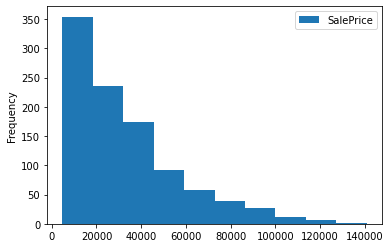

In [6]:
df_temp.plot.hist()

plt.plot()

In [7]:
df_temp[0:100]

,saledate,SalePrice
0,11/16/2006 0:00,66000
1,3/26/2004 0:00,57000
2,2/26/2004 0:00,10000
3,5/19/2011 0:00,38500
4,7/23/2009 0:00,11000
...,...,...
95,12/15/2005 0:00,25500
96,1/29/2004 0:00,17500
97,9/18/2008 0:00,64000
98,11/3/2005 0:00,20500


##Parsing date


In [8]:
df["saledate"]

0        11/16/2006 0:00
1         3/26/2004 0:00
2         2/26/2004 0:00
3         5/19/2011 0:00
4         7/23/2009 0:00
              ...       
24866     9/24/1991 0:00
24867     5/18/2004 0:00
24868      3/5/1991 0:00
24869     5/16/1991 0:00
24870      3/5/1991 0:00
Name: saledate, Length: 24871, dtype: object

In [9]:
df = pd.read_csv("TrainAndValid.csv",
                 parse_dates = ["saledate"])

In [10]:
df["saledate"]

0       2006-11-16
1       2004-03-26
2       2004-02-26
3       2011-05-19
4       2009-07-23
           ...    
24866   1991-09-24
24867   2004-05-18
24868   1991-03-05
24869   1991-05-16
24870   1991-03-05
Name: saledate, Length: 24871, dtype: datetime64[ns]

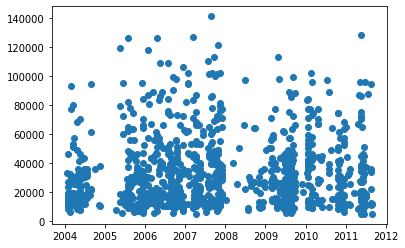

In [11]:
fig, ax = plt.subplots()
ax.scatter(x = df["saledate"][:1000], y= df["SalePrice"][:1000])

##Sorting my data is order by sales date

In [12]:
df = df.sort_values(by = ["saledate"])

In [13]:
df["saledate"][:20]

24108   1989-02-01
24159   1989-02-01
24716   1989-02-01
24585   1989-02-01
24143   1989-02-01
24621   1989-02-01
24746   1989-02-01
24739   1989-02-15
24722   1989-02-28
24721   1989-02-28
24725   1989-02-28
24121   1989-03-09
24119   1989-03-09
24122   1989-03-09
24820   1989-03-14
24115   1989-03-18
24123   1989-03-18
24724   1989-03-22
24711   1989-03-23
24714   1989-03-28
Name: saledate, dtype: datetime64[ns]

In [14]:
df_og = df.copy()

##removing sale date and make the dates more understandable

In [15]:
df["sales_year"] = df["saledate"].dt.year
df["sales_day_of_month"] = df["saledate"].dt.day
df["sales_month"] = df["saledate"].dt.month
df["sales_day_of_week"] = df["saledate"].dt.dayofweek
df["sales_day_of_year"] = df["saledate"].dt.dayofyear


In [16]:
df[:20].T

,24108,24159,24716,24585,24143,24621,24746,24739,24722,24721,24725,24121,24119,24122,24820,24115,24123,24724,24711,24714
SalesID,1250208,1250324,1251795,1251607,1250266,1251671,1251829,1251820,1251802,1251801,1251806,1250233,1250228,1250236,1251920,1250218,1250238,1251805,1251789,1251793
SalePrice,26000,31000,19500,24000,25000,19500,21500,25500,20000,23000,20000,17000,12000,23000,23000,17500,31000,18000,23000,20000
MachineID,1350192,1502667,1156027,1350795,1133319,1538807,1203001,1477953,1199184,1341610,1144264,1138909,1553297,1207436,1130398,1541623,1497349,1105513,1111303,1370708
ModelID,6531,6788,6788,6788,6529,6752,6788,6788,6788,6788,6788,6529,6531,6529,6788,6529,6531,6788,6788,6788
datasource,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132,132
auctioneerID,4,4,4,4,4,4,4,6,1,1,1,1,1,1,1,18,18,1,99,1
YearMade,1978,1988,1985,1987,1984,1986,1985,1985,1985,1985,1985,1981,1980,1981,1985,1978,1979,1985,1985,1985
MachineHoursCurrentMeter,NaN,33.0,NaN,254.0,NaN,400.0,1700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,Low,NaN,Low,NaN,Low,Medium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-01 00:00:00,1989-02-15 00:00:00,1989-02-28 00:00:00,1989-02-28 00:00:00,1989-02-28 00:00:00,1989-03-09 00:00:00,1989-03-09 00:00:00,1989-03-09 00:00:00,1989-03-14 00:00:00,1989-03-18 00:00:00,1989-03-18 00:00:00,1989-03-22 00:00:00,1989-03-23 00:00:00,1989-03-28 00:00:00


In [17]:
df.drop("saledate", axis = 1, inplace=True)

#Turning non numerical data to numerical data


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24871 entries, 24108 to 23972
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   24871 non-null  int64  
 1   SalePrice                 24871 non-null  int64  
 2   MachineID                 24871 non-null  int64  
 3   ModelID                   24871 non-null  int64  
 4   datasource                24871 non-null  int64  
 5   auctioneerID              24871 non-null  int64  
 6   YearMade                  24871 non-null  int64  
 7   MachineHoursCurrentMeter  24001 non-null  float64
 8   UsageBand                 21075 non-null  object 
 9   fiModelDesc               24871 non-null  object 
 10  fiBaseModel               24871 non-null  object 
 11  fiSecondaryDesc           16320 non-null  object 
 12  fiModelSeries             3823 non-null   object 
 13  fiModelDescriptor         6134 non-null   object 
 14  Pr

In [19]:
str_col_names = []
for name in list(df.columns.values):
  if pd.api.types.is_string_dtype(df[name]) == True:
    str_col_names.append(name)

In [20]:
len(str_col_names),len(df.columns.values)

(44, 57)

In [21]:
df_temp = df.copy()
for name in list(df_temp.columns.values):
  if pd.api.types.is_string_dtype(df_temp[name]) == True:
    df_temp[name] = df_temp[name].astype("category")

df = df_temp.copy()

df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24871 entries, 24108 to 23972
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   SalesID                   24871 non-null  int64   
 1   SalePrice                 24871 non-null  int64   
 2   MachineID                 24871 non-null  int64   
 3   ModelID                   24871 non-null  int64   
 4   datasource                24871 non-null  int64   
 5   auctioneerID              24871 non-null  int64   
 6   YearMade                  24871 non-null  int64   
 7   MachineHoursCurrentMeter  24001 non-null  float64 
 8   UsageBand                 21075 non-null  category
 9   fiModelDesc               24871 non-null  category
 10  fiBaseModel               24871 non-null  category
 11  fiSecondaryDesc           16320 non-null  category
 12  fiModelSeries             3823 non-null   category
 13  fiModelDescriptor         6134 non-null   

In [22]:
df.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'Washington DC', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [23]:
df.state.cat.codes

24108     8
24159     8
24716     8
24585     8
24143     8
         ..
23967    10
23968     4
23970     4
23971    43
23972    43
Length: 24871, dtype: int8

##Filling missing values

In [24]:
df.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter      870
UsageBand                    3796
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              8551
fiModelSeries               21048
fiModelDescriptor           18737
ProductSize                 12761
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                19049
Enclosure                      17
Forks                       12501
Pad_Type                    20520
Ride_Control                16431
Stick                       20520
Transmission                14954
Turbocharged                20520
Blade_Extension             23404
Blade_Width                 23404
Enclosure_Type

In [25]:
temp_list = list(df.columns.values)
for name in temp_list:
  if pd.api.types.is_numeric_dtype(df[name]) == True:
    if pd.isnull(df[name]).sum():
      df[name + "_is_missing"] = df[name]
      df_temp[name] = df_temp[name].fillna(df[name].median())
      df[name] = df[name].fillna(df[name].median())
df.T   

,24108,24159,24716,24585,24143,24621,24746,24739,24722,24721,...,23900,23899,23908,23973,23969,23967,23968,23970,23971,23972
SalesID,1250208,1250324,1251795,1251607,1250266,1251671,1251829,1251820,1251802,1251801,...,1222576,1222575,1222593,1222823,1222814,1222811,1222813,1222817,1222820,1222821
SalePrice,26000,31000,19500,24000,25000,19500,21500,25500,20000,23000,...,12500,48000,22000,11000,45000,37000,102000,11000,100000,100000
MachineID,1350192,1502667,1156027,1350795,1133319,1538807,1203001,1477953,1199184,1341610,...,1001805,1061091,617106,1051644,1024552,1049475,1038562,999753,1010621,1016175
ModelID,6531,6788,6788,6788,6529,6752,6788,6788,6788,6788,...,7013,28920,1536,17793,3893,13284,13316,25175,16725,16725
datasource,132,132,132,132,132,132,132,132,132,132,...,121,121,121,121,121,121,121,121,121,121
auctioneerID,4,4,4,4,4,4,4,6,1,1,...,3,3,3,3,3,3,3,3,3,3
YearMade,1978,1988,1985,1987,1984,1986,1985,1985,1985,1985,...,1000,2005,2004,2003,1000,2001,2006,2002,2005,2005
MachineHoursCurrentMeter,2637.0,33.0,2637.0,254.0,2637.0,400.0,1700.0,2637.0,2637.0,2637.0,...,15981.0,0.0,0.0,0.0,13514.0,3197.0,1764.0,7140.0,9946.0,9341.0
UsageBand,NaN,Low,NaN,Low,NaN,Low,Medium,NaN,NaN,NaN,...,Medium,NaN,NaN,NaN,Low,Low,Low,High,High,High
fiModelDesc,350,580,580,580,300,480,580,580,580,580,...,235,WA250PT5L,D3GXL,HR1.6,992C,821C,CX290,570MXT,WA600-3,WA600-3


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24871 entries, 24108 to 23972
Data columns (total 58 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   SalesID                              24871 non-null  int64   
 1   SalePrice                            24871 non-null  int64   
 2   MachineID                            24871 non-null  int64   
 3   ModelID                              24871 non-null  int64   
 4   datasource                           24871 non-null  int64   
 5   auctioneerID                         24871 non-null  int64   
 6   YearMade                             24871 non-null  int64   
 7   MachineHoursCurrentMeter             24871 non-null  float64 
 8   UsageBand                            21075 non-null  category
 9   fiModelDesc                          24871 non-null  category
 10  fiBaseModel                          24871 non-null  category
 11  fiSecondary

In [27]:
df.isna().sum()

SalesID                                    0
SalePrice                                  0
MachineID                                  0
ModelID                                    0
datasource                                 0
auctioneerID                               0
YearMade                                   0
MachineHoursCurrentMeter                   0
UsageBand                               3796
fiModelDesc                                0
fiBaseModel                                0
fiSecondaryDesc                         8551
fiModelSeries                          21048
fiModelDescriptor                      18737
ProductSize                            12761
fiProductClassDesc                         0
state                                      0
ProductGroup                               0
ProductGroupDesc                           0
Drive_System                           19049
Enclosure                                 17
Forks                                  12501
Pad_Type  

In [28]:
pd.Categorical(df["state"]).codes

array([ 8,  8,  8, ...,  4, 43, 43], dtype=int8)

In [29]:
for val in temp_list:
  if pd.api.types.is_categorical_dtype(df[val]) == True:
    df[val + "_is_missing"] = df[val]
    df[val] = pd.Categorical(df[val]).codes + 1
    df[val] = df[val].fillna(0)
    df_temp[val] = pd.Categorical(df[val]).codes + 1
    df_temp[val] = df[val].fillna(0)


In [30]:
df_temp.isnull().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper    

##Lets build a machine learnign model

In [31]:
len(df_temp)

24871

In [32]:
df_train= df_temp[df_temp["sales_year"] < 2012]
df_train.tail()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,sales_year,sales_day_of_month,sales_month,sales_day_of_week,sales_day_of_year
23967,1222811,37000,1049475,13284,121,3,2001,3197.0,2,835,...,0,0,0,3,2,2011,29,12,3,363
23968,1222813,102000,1038562,13316,121,3,2006,1764.0,2,1071,...,0,0,0,0,0,2011,29,12,3,363
23970,1222817,11000,999753,25175,121,3,2002,7140.0,1,573,...,0,0,0,0,0,2011,29,12,3,363
23971,1222820,100000,1010621,16725,121,3,2005,9946.0,1,2322,...,0,0,0,3,2,2011,29,12,3,363
23972,1222821,100000,1016175,16725,121,3,2005,9341.0,1,2322,...,0,0,0,3,2,2011,29,12,3,363


In [33]:
df_valid = df_temp.query('sales_month >= 1 & sales_month <= 4 & sales_year == 2012')
df_valid

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,sales_year,sales_day_of_month,sales_month,sales_day_of_week,sales_day_of_year


In [34]:
x_train = df_train.drop("SalePrice", axis = 1)
y_train = df_train["SalePrice"]

In [35]:
x_train

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,sales_year,sales_day_of_month,sales_month,sales_day_of_week,sales_day_of_year
24108,1250208,1350192,6531,132,4,1978,2637.0,0,375,149,...,0,0,0,0,0,1989,1,2,2,32
24159,1250324,1502667,6788,132,4,1988,33.0,2,578,222,...,0,0,0,0,0,1989,1,2,2,32
24716,1251795,1156027,6788,132,4,1985,2637.0,0,578,222,...,0,0,0,0,0,1989,1,2,2,32
24585,1251607,1350795,6788,132,4,1987,254.0,2,578,222,...,0,0,0,0,0,1989,1,2,2,32
24143,1250266,1133319,6529,132,4,1984,2637.0,0,245,111,...,0,0,0,0,0,1989,1,2,2,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23967,1222811,1049475,13284,121,3,2001,3197.0,2,835,292,...,0,0,0,3,2,2011,29,12,3,363
23968,1222813,1038562,13316,121,3,2006,1764.0,2,1071,408,...,0,0,0,0,0,2011,29,12,3,363
23970,1222817,999753,25175,121,3,2002,7140.0,1,573,220,...,0,0,0,0,0,2011,29,12,3,363
23971,1222820,1010621,16725,121,3,2005,9946.0,1,2322,1004,...,0,0,0,3,2,2011,29,12,3,363


In [36]:
y_train

24108     26000
24159     31000
24716     19500
24585     24000
24143     25000
          ...  
23967     37000
23968    102000
23970     11000
23971    100000
23972    100000
Name: SalePrice, Length: 24871, dtype: int64

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

model = RandomForestRegressor()

In [38]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [39]:
def root_mean_squared_log_error(y_true, y_pred):
  return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [40]:
def reg_score(y_true, y_pred):
  print("RMSLE : " + str(root_mean_squared_log_error(y_true, y_pred)))
  print("MAE : " + str( mean_absolute_error(y_true, y_pred)))
  print("R^2 : " + str(r2_score(y_true, y_pred)) )

In [41]:
model = RandomForestRegressor(n_jobs = -1,
                              random_state = 42)
model.fit(x_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [42]:
reg_score(y_train, model.predict(x_train))

RMSLE : 0.09953287368994987
MAE : 1928.682031281412
R^2 : 0.984198225637541


In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
parameters = {
    "n_estimators" : np.arange(10,100,10),
    "max_depth" : [None, 3,5,10],
    "min_samples_split" : np.arange(2,20,2),
    "min_samples_leaf" : np.arange(1,20,2),
    "max_features" : [0.5, 1, "Sqrt", "auto"],
    "max_samples": [10000]
}

model_rscv = RandomizedSearchCV(RandomForestRegressor(n_jobs = -1,
                                               random_state= 42), 
                                                parameters,
                                                n_iter = 2,
                                                cv = 5,
                                                verbose = True)
model_rscv.fit(x_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'Sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [46]:
def df_data_prepare(df):
  df["sales_year"] = df["saledate"].dt.year
  df["sales_day_of_month"] = df["saledate"].dt.day
  df["sales_month"] = df["saledate"].dt.month
  df["sales_day_of_week"] = df["saledate"].dt.dayofweek
  df["sales_day_of_year"] = df["saledate"].dt.dayofyear
  df.drop("saledate", axis = 1, inplace=True)
  str_col_names = []
  for name in list(df.columns.values):
    if pd.api.types.is_string_dtype(df[name]) == True:
      str_col_names.append(name)
  df_temp_2 = df.copy()
  for name in list(df_temp_2.columns.values):
    if pd.api.types.is_string_dtype(df_temp_2[name]) == True:
      df_temp_2[name] = df_temp_2[name].astype("category")

  df = df_temp_2.copy()

  temp_list = list(df.columns.values)
  for name in temp_list:
    if pd.api.types.is_numeric_dtype(df[name]) == True:
      if pd.isnull(df[name]).sum():
        df[name + "_is_missing"] = df[name]
        df_temp_2[name] = df_temp_2[name].fillna(df[name].median())
        df[name] = df[name].fillna(df[name].median())
  for val in temp_list:
    if pd.api.types.is_categorical_dtype(df[val]) == True:
      df[val + "_is_missing"] = df[val]
      df[val] = pd.Categorical(df[val]).codes + 1
      df[val] = df[val].fillna(0)
      df_temp_2[val] = pd.Categorical(df[val]).codes + 1
      df_temp_2[val] = df[val].fillna(0)

  return df_temp_2

df_valid = pd.read_csv("Valid.csv",
                 parse_dates = ["saledate"])
df_valid = df_data_prepare(df_valid)

In [47]:
df_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11573 entries, 0 to 11572
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   11573 non-null  int64  
 1   MachineID                 11573 non-null  int64  
 2   ModelID                   11573 non-null  int64  
 3   datasource                11573 non-null  int64  
 4   auctioneerID              11573 non-null  int64  
 5   YearMade                  11573 non-null  int64  
 6   MachineHoursCurrentMeter  11573 non-null  float64
 7   UsageBand                 11573 non-null  int8   
 8   fiModelDesc               11573 non-null  int16  
 9   fiBaseModel               11573 non-null  int16  
 10  fiSecondaryDesc           11573 non-null  int8   
 11  fiModelSeries             11573 non-null  int8   
 12  fiModelDescriptor         11573 non-null  int8   
 13  ProductSize               11573 non-null  int8   
 14  fiProd

In [48]:
df_valid.isnull().sum()

SalesID                     0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper                      0
Scarifier 

In [49]:
valid_solution = pd.read_csv("ValidSolution.csv")
valid_solition = valid_solution.sort_values("SalesID")
df_valid = df_valid.sort_values("SalesID")

x_valid = df_valid
y_valid = valid_solution["SalePrice"]
y_valid_pred = model_rscv.predict(x_valid)

reg_score(y_valid, y_valid_pred)


RMSLE : 0.5549772427536982
MAE : 15448.901941678178
R^2 : 0.1646592910665542


In [50]:
# ideal model parameter (i didnt figure this out using random search cv as its power and time consuming so i used data from someone else who figured it out)
%%time
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf= 1,
                                    min_samples_split = 14,
                                    max_features = 0.5,
                                    n_jobs = -1,
                                    max_samples = None)
ideal_model.fit(x_train,y_train)

CPU times: user 7.2 s, sys: 30.4 ms, total: 7.23 s
Wall time: 3.84 s


In [51]:
reg_score(y_valid,ideal_model.predict(x_valid))

RMSLE : 0.45871234367351393
MAE : 12783.413053578755
R^2 : 0.432142437348104


In [52]:
x_test = pd.read_csv("Test.csv",
                      parse_dates = ["saledate"])
x_test = df_data_prepare(x_test)
x_test.isnull().sum()

SalesID                     0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper                      0
Scarifier 

In [56]:
y_test = pd.read_csv("test_predictions.csv")
y_test = y_test["SalesPrice"]

In [57]:
reg_score(y_test,ideal_model.predict(x_test))

RMSLE : 0.36525173082881984
MAE : 6884.441546633017
R^2 : 0.64564370237971


##Changing the format of the final output so i could submit it on kaggle

In [58]:
df_final = pd.DataFrame({"SalesID" : x_test["SalesID"],
                         "SalePrice" : ideal_model.predict(x_test)})
df_final

,SalesID,SalePrice
0,1227829,17796.625225
1,1227844,23297.529961
2,1227847,51466.876186
3,1227848,72523.611365
4,1227863,31126.928397
...,...,...
12452,6643171,39747.924056
12453,6643173,19393.881692
12454,6643184,15627.056450
12455,6643186,17147.087893


In [59]:
df_final.to_csv("final_predictions_for_end_to_end_bulldozer_price_regression.csv", index = False)

##Feature importance

In [60]:
df_fi = pd.DataFrame({"Column Name" : x_train.columns,
                      "Column Importance" : ideal_model.feature_importances_})
df_fi = df_fi.sort_values("Column Importance", ascending=False)
df_fi


,Column Name,Column Importance
19,Enclosure,0.167934
5,YearMade,0.121348
14,fiProductClassDesc,0.078876
13,ProductSize,0.071310
10,fiSecondaryDesc,0.057213
37,Coupler_System,0.050633
38,Grouser_Tracks,0.042051
2,ModelID,0.041705
8,fiModelDesc,0.033914
39,Hydraulics_Flow,0.029966
